### The image Degraded.jpg has been degraded in some way. Try to find out what kind of degradation has been applied on the image and try to restore it. The original image before degradation is Clean.jpg. Clearly explain what you did to restore the image.

In [65]:
%matplotlib inline

import cv2
import numpy as np
from matplotlib import pyplot as plt
import math

In [66]:
i1 = './A2_resources/Degraded.jpg'

img1 = cv2.imread(i1)

In [67]:
def im2col(A, block, stepsize=1):
    m,n = A.shape
    s0, s1 = A.strides    
    nrows = m-block[0]+1
    ncols = n-block[1]+1
    shp = block[0],block[1],nrows,ncols
    strd = s0,s1,s0,s1

    out_view = np.lib.stride_tricks.as_strided(A, shape=shp, strides=strd)
    return out_view.reshape(block[0]*block[1],-1)[:,::stepsize]

In [68]:
def median_filter(img, k):
    a1, a2 = img.shape

    imcol = im2col(img, (a1-k+1,a2-k+1))
    y = np.median(imcol, axis = 1)
    y = y.reshape(a1-k+1, a2-k+1)
    
    return y

In [69]:
b, g, r = cv2.split(img1)
k = 3

In [70]:
b = (median_filter(b, k)).astype(np.uint8)
g = (median_filter(g, k)).astype(np.uint8)
r = (median_filter(r, k)).astype(np.uint8)

In [71]:
b = np.clip(b, 0, 255)
g = np.clip(g, 0, 255)
r = np.clip(r, 0, 255)

In [72]:
img3 = cv2.imread(i1)
b3, g3, r3 = cv2.split(img3)
img3 = cv2.merge((r3,g3,b3))

In [73]:
img2 = cv2.merge((r,g,b))

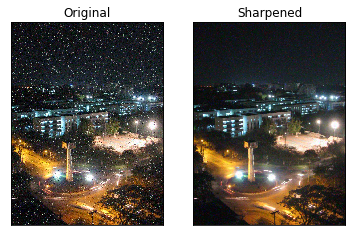

In [74]:
plt.subplot(121),plt.imshow(img3)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img2)
plt.title('Sharpened'), plt.xticks([]), plt.yticks([])
plt.show()